In [1]:
import sys
sys.path.append('..')
from harang import utils

import seaborn as sns
import numpy as np

<IPython.core.display.Javascript object>

In [2]:
pseudo = 'stage1'

# Classification

In [3]:
x = np.concatenate([utils.from_pickle(f'data/test.pkl'), utils.from_pickle(f'data/unlabeled.pkl')])
y = np.concatenate([utils.from_pickle(f'{pseudo}/test_preds/cls/ensemble_0.8663.pkl'), utils.from_pickle(f'{pseudo}/unlabeled_pred/cls/pred.pkl')])

[25791, 25685, 25400, 25748] 13471


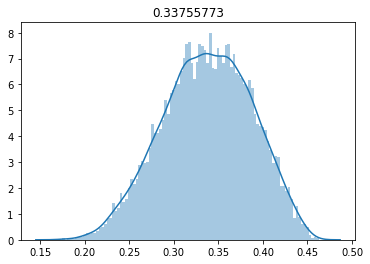

In [6]:
threshes = [0.13, 0.28, 0.1, 0.12]
conf = np.abs(y-0.5)
class_indices = [np.where(conf[:, i]>threshes[i])[0] for i in range(4)]
indices = list(set.intersection(*(set(i) for i in class_indices)))
print([len(i) for i in class_indices], len(indices))
sns.distplot(conf[indices].mean(axis=1), bins=100).set_title(conf[indices].mean());

In [7]:
utils.to_pickle(f'{pseudo}/pseudo/cls/x_pseudo.pkl', x[indices])
utils.to_pickle(f'{pseudo}/pseudo/cls/y_pseudo.pkl', y[indices])

# Segmentation

In [3]:
x = np.concatenate([utils.from_pickle(f'data/test.pkl'), utils.from_pickle(f'data/unlabeled.pkl')])
y = np.concatenate([utils.from_pickle(f'{pseudo}/test_preds/seg/ensemble_0.6473_0.6553.pkl').astype(np.float16), utils.from_pickle(f'{pseudo}/unlabeled_pred/seg/pred.pkl')])

In [4]:
conf = np.abs(y-0.5).mean(axis=(1,2))

[25947, 26046, 25937, 26109] 13686


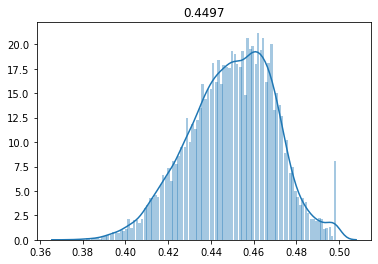

In [32]:
threshes = [0.341, 0.353, 0.370, 0.387]
class_indices = [np.where(conf[:, i]>threshes[i])[0] for i in range(4)]
indices = list(set.intersection(*(set(i) for i in class_indices)))
print([len(i) for i in class_indices], len(indices))
sns.distplot(conf[indices].mean(axis=1), bins=100).set_title(conf[indices].mean());

In [34]:
utils.to_pickle(f'{pseudo}/pseudo/seg/x_pseudo.pkl', x[indices])
utils.to_pickle(f'{pseudo}/pseudo/seg/y_pseudo.pkl', y[indices])